# Thera Bank Personal Loan Campaign


Data Description:
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

 

Domain:
Banking

 

Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

Attribute Information:
ID: Customer ID
Age: Customer's age in completed years
Experience: #years of professional experience
Income: Annual income of the customer ($000)
ZIP Code: Home Address ZIP
Family: Family size of the customer
CCAvg: Avg. spending on credit cards per month ($000)
Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
Mortgage: Value of house mortgage if any. ($000)
Personal Loan: Did this customer accept the personal loan offered in the last campaign?
Securities Account: Does the customer have a securities account with the bank?
CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
Online: Does the customer use internet banking facilities?
Credit card: Does the customer use a credit card issued by the bank?
 

Learning Outcomes:
Exploratory Data Analysis
Preparing the data to train a model
Training and making predictions using a classification model
Model evaluation
 

Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

 

Steps and tasks:
Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)
EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
Number of unique in each column?
Number of people with zero mortgage?
Number of people with zero credit card spending per month?
Value counts of all categorical columns.
Univariate and Bivariate
Get data model ready


Split the data into training and test set in the ratio of 70:30 respectively (5 marks)


Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)


Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)
Give conclusion related to the Business understanding of your model? (5 marks)

In [8]:
#importing libraries 

import pandas as pd 

import numpy as np


import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from scipy import stats

from sklearn import metrics

from sklearn.impute import SimpleImputer

import warnings 

warnings.filterwarnings('ignore')

from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB

from yellowbrick.classifier import classification_report


#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [9]:
#this loads the rating file 

df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [10]:
df.shape

(5000, 14)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [12]:
#Lets analysze the distribution of the various attribute
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


all values make sense except for experience 

In [13]:
#Null Valus

df.isnull().values.any()

False

In [14]:
cols=['Experience']

rep_less_than_0 = SimpleImputer(missing_values = -1, strategy="mean")
imputer = rep_less_than_0.fit(df[cols])
df[cols] = imputer.transform(df[cols])

rep_less_than_0 = SimpleImputer(missing_values = -2, strategy="mean")
imputer = rep_less_than_0.fit(df[cols])
df[cols] = imputer.transform(df[cols])

rep_less_than_0 = SimpleImputer(missing_values = -3, strategy="mean")
imputer = rep_less_than_0.fit(df[cols])
df[cols] = imputer.transform(df[cols])

df.describe()

#Replaced values -1,-2,-3 in experience for the mean value 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.330415,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.252987,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,11.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.244816,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# Number 2 


# Number of unique in each column?

In [15]:
df.nunique() # Number of unique values in a column

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

# Number of people with zero mortgage?


In [16]:
#finding the row location of "mortgage" equals to zero

df.loc[df['Mortgage'] == 0].shape

(3462, 14)

this means 3462 customers do not have a mortgage

# Number of people with zero credit card spending per month?



In [17]:
df.loc[df['CCAvg'] == 0].shape

(106, 14)

this means 106 customers have a zero averge credit spending per month 

In [18]:
df['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [19]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [20]:
df['Securities Account'].value_counts()



0    4478
1     522
Name: Securities Account, dtype: int64

In [21]:
df['Securities Account'].value_counts()


0    4478
1     522
Name: Securities Account, dtype: int64

In [22]:
df['CD Account'].value_counts()



0    4698
1     302
Name: CD Account, dtype: int64

In [23]:
df['Online'].value_counts()



1    2984
0    2016
Name: Online, dtype: int64

In [24]:
df['CreditCard'].value_counts()



0    3530
1    1470
Name: CreditCard, dtype: int64

# Univariate and Bivariate



<AxesSubplot:xlabel='Education', ylabel='count'>

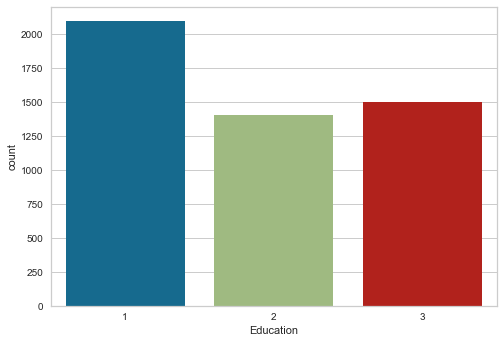

In [25]:
sns.countplot(df['Education'])

#countplot of people with education 

<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

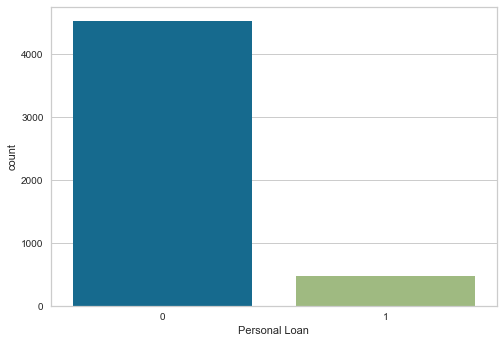

In [26]:
#countplot of people that have a personal loan and those that do not

sns.countplot(df['Personal Loan'])



<AxesSubplot:xlabel='Securities Account', ylabel='count'>

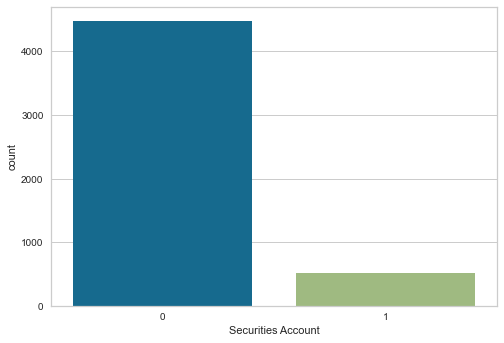

In [27]:

#countplot of people that have a securitites account and those that do not 


sns.countplot(df['Securities Account'])



<AxesSubplot:xlabel='CD Account', ylabel='count'>

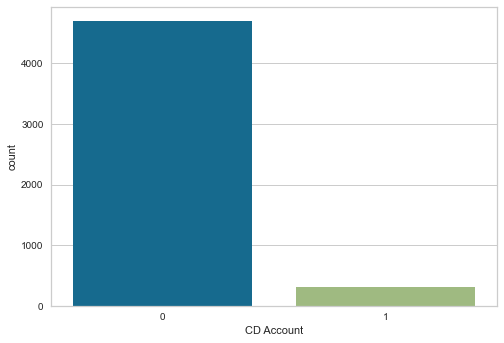

In [28]:
#countplot of people that have a securitites account and those that do not 

sns.countplot(df['CD Account'])



<AxesSubplot:xlabel='Online', ylabel='count'>

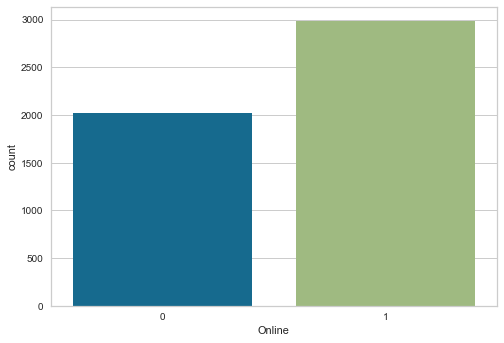

In [29]:
#countplot of people that have a securitites account and those that do not 

sns.countplot(df['Online'])



<AxesSubplot:xlabel='CreditCard', ylabel='count'>

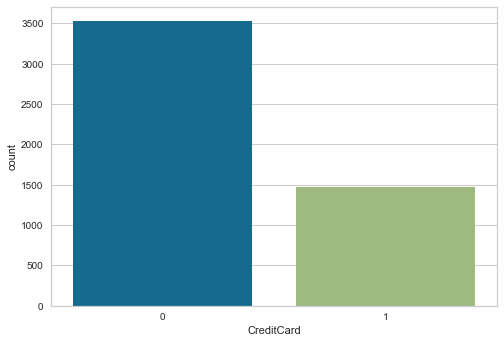

In [30]:
#countplot of people that have a securitites account and those that do not 

sns.countplot(df['CreditCard'])

<AxesSubplot:xlabel='Family', ylabel='count'>

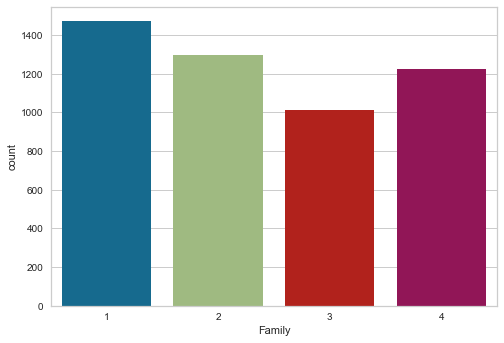

In [31]:
sns.countplot(df['Family'])

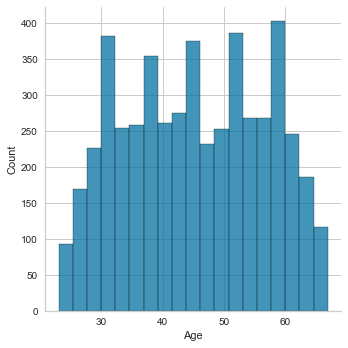

In [32]:
sns.displot(df['Age'])

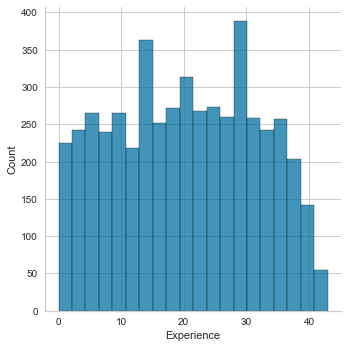

In [33]:
sns.displot(df['Experience'])

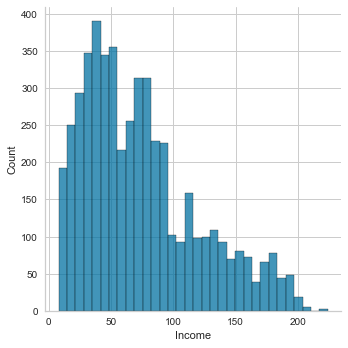

In [34]:
sns.displot(df['Income'])

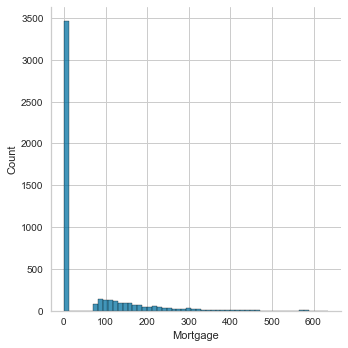

In [35]:
sns.displot(df['Mortgage'])



Large number of people do not have a mortgage 

In [36]:
##bivariate 

In [37]:
#Will be doing analysis over credit card average since this is a good variable when considering giving out a loan 

#sns.jointplot(data=df, x="Income", y="CCsns.pairplot(penguins, hue="species"Avg")


<AxesSubplot:xlabel='Personal Loan', ylabel='CCAvg'>

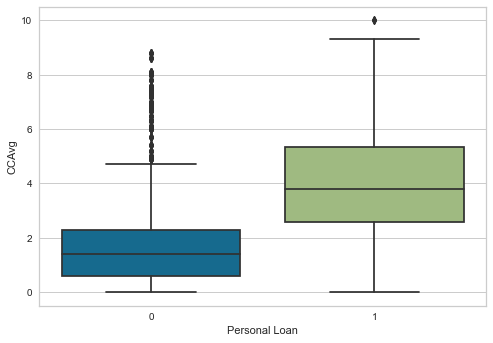

In [38]:
sns.boxplot(data=df, x="Personal Loan", y="CCAvg")

#this lets us visualize the People that accepted the loan level versus the CCAvg 

In [39]:
#This lets us visualize the People that accepted the loan level versus the CCAvg 
#Most People had a higher average CC monthly average. 


Mortgage, CCAvg, and Income are parameters to compare since we would ideally like to exclude people with high monthly CC Avg and high mortgages and low incomes

In [41]:
#Getting the Data Ready 

In [42]:
#dropping ID Column since it does not make sense to include in in the model

#dropping ZIP Code since it does not add much value to the algorithm 

cr_df = df.drop(['ZIP Code', 'ID'], axis =1 )

cr_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1.0,49,4,1.6,1,0,0,1,0,0,0
1,45,19.0,34,3,1.5,1,0,0,1,0,0,0
2,39,15.0,11,1,1.0,1,0,0,0,0,0,0
3,35,9.0,100,1,2.7,2,0,0,0,0,0,0
4,35,8.0,45,4,1.0,2,0,0,0,0,0,1


In [43]:
cr_df.describe()


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.330415,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.252987,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,11.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.244816,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [44]:
cr_df.groupby(["Personal Loan"]).mean()


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,
0,45.367257,20.382097,66.237389,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,45.066667,19.843750,144.745833,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


In [45]:
#No major difference in Age, Experience, Family, Securities Account, Online, and Credit Card

#Major Differences in:

#Income - People with higher median Incomes take out more loans
#CCAvg - Is almost double of people for people who have personal loans
#Education - Is a bit higher for people who have personal loans 
#Mortgage - Mean mortgage value is about double for people with personal loans 
#CD Account - Large difference people with no personal loans - 0.035, while people with loans .29 (about 8 times more)


In [46]:
cr_df.groupby(["Personal Loan"]).median()



,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,
0,45.0,20.244816,59.0,2.0,1.4,2.0,0.0,0.0,0.0,1.0,0.0
1,45.0,20.000000,142.5,3.0,3.8,2.0,0.0,0.0,0.0,1.0,0.0


In [47]:
cr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   float64
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 468.9 KB


In [48]:
cr_df = pd.get_dummies(cr_df, columns=['Education'],drop_first=True)

#Added dummy variables for Education and dropped the first Edcuation column since this can be treated as a categorical variable


In [49]:
X = cr_df.drop('Personal Loan', axis=1)
Y = cr_df['Personal Loan']



In [50]:
#Split into training and test set
#Shuffleing our data so that it is randomly picked 


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=69)

In [51]:
logreg = LogisticRegression(random_state=6977769,fit_intercept=False)
logreg.fit(X_train, y_train)                    # fit the model on train data

LogisticRegression(fit_intercept=False, random_state=6977769)

In [52]:
y_predict = logreg.predict(X_test)              # Predicting the target variable on test data

In [53]:
# Observe the predicted and observed classes in a dataframe.

z = X_test.copy()
z['Observed Personal Loan'] = y_test
z['Predicted Personal Loan'] = y_predict
z.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_2,Education_3,Observed Personal Loan,Predicted Personal Loan
4068,59,34.0,21,2,0.5,0,0,0,1,0,1,0,0,0
2679,57,32.0,43,2,2.1,166,0,0,1,0,0,1,0,0
4475,43,18.0,59,3,0.8,91,0,0,1,0,0,1,0,0
2547,38,13.0,15,2,0.1,90,0,0,1,0,1,0,0,0
1472,34,8.0,8,3,0.1,83,0,0,1,0,1,0,0,0


In [54]:

mispredictions = z['Observed Personal Loan']+z['Predicted Personal Loan']


z['mispredictions'] = mispredictions

z

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_2,Education_3,Observed Personal Loan,Predicted Personal Loan,mispredictions
4068,59,34.0,21,2,0.5,0,0,0,1,0,1,0,0,0,0
2679,57,32.0,43,2,2.1,166,0,0,1,0,0,1,0,0,0
4475,43,18.0,59,3,0.8,91,0,0,1,0,0,1,0,0,0
2547,38,13.0,15,2,0.1,90,0,0,1,0,1,0,0,0,0
1472,34,8.0,8,3,0.1,83,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,49,24.0,70,1,2.9,0,0,0,0,0,0,0,0,0,0
1659,33,7.0,139,1,4.0,106,0,1,1,1,0,1,1,1,2
3851,46,21.0,99,2,3.8,194,0,0,1,0,0,1,0,0,0
3374,57,31.0,61,1,2.2,0,0,0,0,0,0,1,0,0,0


In [55]:
z['mispredictions'].value_counts(normalize=False)

0    1329
2      90
1      81
Name: mispredictions, dtype: int64

In [56]:
# this gives us the number of correct prediction (0 and 2, which consisit of true posistives and true negatives)
# and the mispredictions (1, which consist of false postives and false negatives)


In [57]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed Personal Loan')
    plt.xlabel('Predicted Personal Loan')
    plt.show()

Results of Logistic Regression


Confusion Matrix


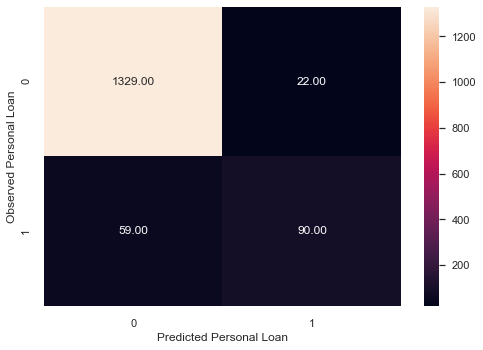

None


Trainig accuracy 0.9354285714285714

Testing accuracy 0.946


Recall: 0.6040268456375839

Precision: 0.8035714285714286

F1 Score: 0.6896551724137931

Roc Auc Score: 0.9559411621518239


In [58]:
print('Results of Logistic Regression')
print()
print()
print('Confusion Matrix')

print(draw_cm(y_test,y_predict))
print()
print()
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,logreg.predict_proba(X_test)[:,1] ))

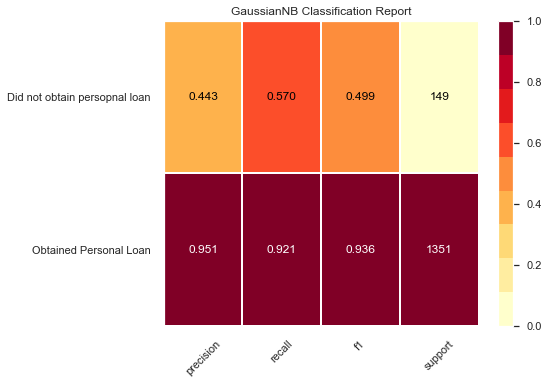

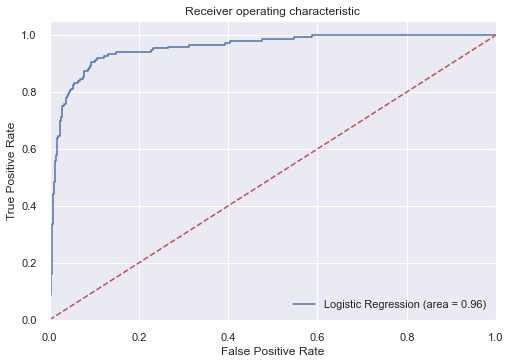

In [59]:

logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [68]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(logreg.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
7,CD Account,2.72
10,Education_2,2.43
11,Education_3,2.24
9,CreditCard,0.90
8,Online,0.80
6,Securities Account,0.37
0,Age,0.28
1,Experience,0.25
3,Family,0.10
4,CCAvg,0.06


##### `Confusion matrix means`

*True Positive (observed=1,predicted=1):*

Correctly predicted that the customer would get Personal Loan 

*False Positive (observed=0,predicted=1):*

Falsely predicted that the customer would get Personal Loan.

*True Negative (observed=0,predicted=0):*

Correctly predicted that the customer would NOT get Personal Loan.  

*False Negative (observed=1,predicted=0):*

Falsely predicted that the customer would NOT get Personal Loan.  


##### `Important Features`

"CD Account", "Education_2", "Education_3", "CreditCard", "Online"

seems to be top 5 features which influence the model's output. Based on the coefficients value.

"Mortgage"

has coefficients value as 0 so this feature doesn't help model in predicting target variable.


##### `Important Metric`

We want to make an effective marketing campaign and target the correct customers, so the False Positive rate is the most important since ad money is being spent on leads that will not convert into customers.  

False Negatives are less important since no money is being spent on targeting this group, but are still being converted into customers. 

Since False Postitives are of high important and False Negatives are not, Precision is the most important metric since Precision = TP/TP+FP

This model can be used for future leads and know if the company should spend resources to convert them into customers. As more data is gathered, analysis can be made on the False Positives which can help improving the model in futures iterations. 

In [64]:
z

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_2,Education_3,Observed Personal Loan,Predicted Personal Loan,mispredictions
4068,59,34.0,21,2,0.5,0,0,0,1,0,1,0,0,0,0
2679,57,32.0,43,2,2.1,166,0,0,1,0,0,1,0,0,0
4475,43,18.0,59,3,0.8,91,0,0,1,0,0,1,0,0,0
2547,38,13.0,15,2,0.1,90,0,0,1,0,1,0,0,0,0
1472,34,8.0,8,3,0.1,83,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,49,24.0,70,1,2.9,0,0,0,0,0,0,0,0,0,0
1659,33,7.0,139,1,4.0,106,0,1,1,1,0,1,1,1,2
3851,46,21.0,99,2,3.8,194,0,0,1,0,0,1,0,0,0
3374,57,31.0,61,1,2.2,0,0,0,0,0,0,1,0,0,0


In [76]:
#This shows all rows where the prediction was wrong in the test data 

print(' \n\n\n       This shows shows all rows where the prediction was wrong in the test data ')

z.loc[z['mispredictions'] == 1]


 


       This shows shows all rows where the prediction was wrong in the test data 


,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_2,Education_3,Observed Personal Loan,Predicted Personal Loan,mispredictions
537,44,20.0,131,1,4.9,0,0,0,1,0,0,1,1,0,1
459,35,10.0,200,2,3.0,458,0,0,0,0,0,0,0,1,1
2544,58,34.0,90,1,3.6,0,0,0,0,0,1,0,1,0,1
2539,32,7.0,98,1,4.2,171,1,1,0,0,0,0,1,0,1
1125,37,13.0,172,2,6.5,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870,63,37.0,110,1,4.1,0,0,0,0,0,0,1,1,0,1
4480,55,30.0,145,2,6.0,0,0,0,1,0,0,1,1,0,1
151,26,0.0,132,3,6.5,0,0,0,0,1,0,1,1,0,1
382,65,41.0,133,4,2.0,0,0,0,0,1,0,0,1,0,1


##### `Confusion matrix means`

*True Positive (observed=1,predicted=1):*

Correctly predicted that the customer would get Personal Loan 

*False Positive (observed=0,predicted=1):*

Falsely predicted that the customer would get Personal Loan.

*True Negative (observed=0,predicted=0):*

Correctly predicted that the customer would NOT get Personal Loan.  

*False Negative (observed=1,predicted=0):*

Falsely predicted that the customer would NOT get Personal Loan.  


##### `Important Features`

"CD Account", "Education_2", "Education_3", "CreditCard", "Online"

seems to be top 5 features which influence the model's output. Based on the coefficients value.

"Mortgage"

has coefficients value as 0 so this feature doesn't help model in predicting target variable.


##### `Important Metric`

We want to make an effective marketing campaign and target the correct customers, so the False Positive rate is the most important since ad money is being spent on leads that will not convert into customers.  

False Negatives are less important since no money is being spent on targeting this group, but are still being converted into customers. 

Since False Postitives are of high important and False Negatives are not, Precision is the most important metric since Precision = TP/TP+FP

This model can be used for future leads and know if the company should spend resources to convert them into customers. As more data is gathered, analysis can be made on the False Positives which can help improving the model in futures iterations. 